# Домашнее задания 6
### Рачинский Максим 175
#### Вариант 9

### Подключим необходимые библиотеки для работы

Для кластеризации будем использовать библиотеку [pyclustering](https://codedocs.xyz/annoviko/pyclustering/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmeans import kmeans_visualizer

### Загрузим данные для анализа

In [2]:
grid = pd.read_csv('data/task_6.csv', sep=';', dtype='float')
data = grid[['x9', 'y9']]
data = data.dropna()
data = data.rename(index=str, columns={'x9':'x', 'y9':'y'})

data.head()

,x,y
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0


Опишем функцию для кодировки результатов кластеризации

In [3]:
def get_encoded(clusters, samples_size):
    encoded = np.zeros(samples_size)
    for i, cluster in enumerate(clusters):
        for sample in cluster:
            encoded[sample] = i
            
    return encoded

Опишем функцию для составления случайных центров для кластеров

In [4]:
def get_centers(n_clusters):
    return [[np.random.randint(0, 80), np.random.randint(0, 80)] for _ in range(n_clusters)]

### Воспользуемся методом k-средних для кластеризации данных

Будем использовать k = 2, 3, 4

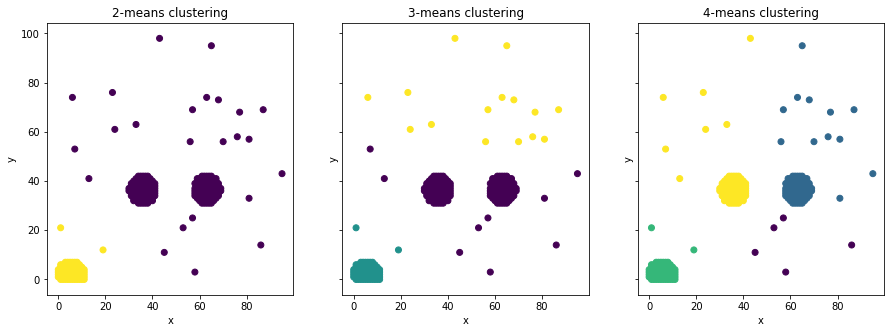

In [5]:
k_list = [2, 3, 4]
train_data = np.stack([np.array(data['x']), np.array(data['y'])], axis=1)
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))

for i, k in enumerate(k_list):
    km = kmeans(train_data, get_centers(k))
    km.process()
    labels = get_encoded(km.get_clusters(), len(data))
    
    axes[i].scatter(data['x'], data['y'], c=labels)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'{k}-means clustering')

Для k = 3, 4 кластеризация выявила исходные 3 монеты 

Также по изображениям видно, что число кластеров должно равняться 4: 3 монеты и выбросы

### Воспользуемся методом k-медиан для кластеризации данных

Будем использовать те же k = 2, 3, 4

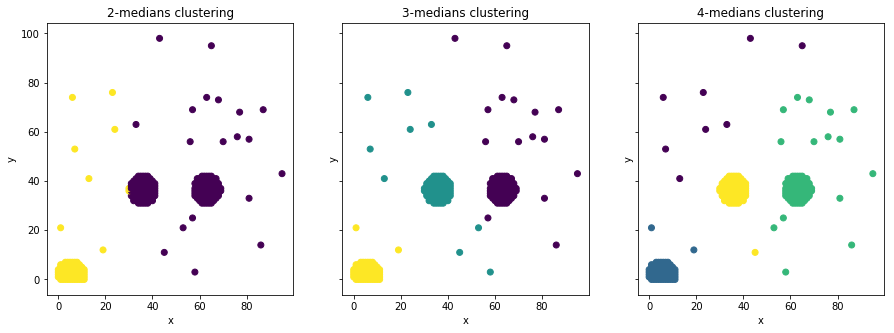

In [6]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))

for i, k in enumerate(k_list):
    km = kmedians(train_data, get_centers(k))
    km.process()
    labels = get_encoded(km.get_clusters(), len(data))
    
    axes[i].scatter(data['x'], data['y'], c=labels)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'{k}-medians clustering')

По изображениям мы видим, что как и для средних при k = 3, 4, кластеризатор правильно отделяет классы монет

При том особой разницы при разграничении визуально не наблюдается. Есть различия разве что при двух кластерах, когда в плотном облаке фиолетового класса, присутствует точка желтого класса, но этим можно пренебречь